In [3]:
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
import os
import re
import pandas as pd

# Define the parameters of interest and their corresponding regex patterns
parameters = [
    'total time spent by all reduce tasks',
    'total time spent by all map tasks',
    'CPU time spent',
    'Peak Map Physical memory',
    'Peak Map Virtual memory',
    'Peak Reduce Physical memory',
    'Peak Reduce Virtual memory',
    'garbage collection time elapsed'
]

patterns = {
    'total time spent by all reduce tasks': re.compile(r'Total time spent by all reduce tasks \(ms\)=(\d+)'),
    'total time spent by all map tasks': re.compile(r'Total time spent by all map tasks \(ms\)=(\d+)'),
    'CPU time spent': re.compile(r'CPU time spent \(ms\)=(\d+)'),
    'Peak Map Physical memory': re.compile(r'Peak Map Physical memory \(bytes\)=(\d+)'),
    'Peak Map Virtual memory': re.compile(r'Peak Map Virtual memory \(bytes\)=(\d+)'),
    'Peak Reduce Physical memory': re.compile(r'Peak Reduce Physical memory \(bytes\)=(\d+)'),
    'Peak Reduce Virtual memory': re.compile(r'Peak Reduce Virtual memory \(bytes\)=(\d+)'),
    'garbage collection time elapsed': re.compile(r'GC time elapsed \(ms\)=(\d+)')
}

# Function to extract performance metrics from a file using regex patterns
def extract_metrics(file_path):
    metrics = {}
    with open(file_path, 'r') as f:
        content = f.read()
        for param, pattern in patterns.items():
            match = pattern.search(content)
            if match:
                metrics[param] = int(match.group(1))
            else:
                metrics[param] = None  # Handle cases where parameter is not found
    return metrics

# Function to read settings from settings.txt
def read_settings(settings_path):
    with open(settings_path, 'r') as f:
        settings = {}
        for line in f:
            key, value = line.strip().split(': ')
            settings[key.strip()] = value.strip()
    return settings

# Main script to iterate through folders and specific files
output_folder = (r'C:\Users\noemi\Documents\GitHub\CloudComputingProject\output')

data = []

# Specify the files explicitly
files_to_process = ['Seagul_English.txt', 'LordOfTheRings_English.txt', 'BookReviews_5Million.txt']

for folder_name in os.listdir(output_folder):
    folder_path = os.path.join(output_folder, folder_name)
    if os.path.isdir(folder_path):
        performance_folder = os.path.join(folder_path, 'performance')
        if os.path.exists(performance_folder):
            settings_path = os.path.join(folder_path, 'settings.txt')
            settings = read_settings(settings_path)
            for file_name in files_to_process:
                file_path = os.path.join(performance_folder, file_name)
                if os.path.exists(file_path):
                    metrics = extract_metrics(file_path)
                    metrics.update(settings)  # Merge settings into metrics
                    metrics['folder'] = folder_name
                    metrics['file'] = file_name
                    data.append(metrics)
                else:
                    print(f"File not found: {file_path}")
        else:
            print(f"Performance folder not found: {performance_folder}")

# Convert data to pandas DataFrame
df = pd.DataFrame(data)
    
    # Extract algorithm from settings
df['algorithm'] = df['algorithm']  # Assuming this is correctly extracted
    
df

,total time spent by all reduce tasks,total time spent by all map tasks,CPU time spent,Peak Map Physical memory,Peak Map Virtual memory,Peak Reduce Physical memory,Peak Reduce Virtual memory,garbage collection time elapsed,algorithm,n_reducers,folder,file
0,3009,3014,1810,330997760,3423293440,214413312,3429343232,204,Combiner,1,151,Seagul_English.txt
1,3520,5777,5220,512958464,3428646912,217866240,3431571456,280,Combiner,1,151,LordOfTheRings_English.txt
2,632357,2173839,2371460,787648512,3433963520,229253120,3437924352,10199,Combiner,1,151,BookReviews_5Million.txt
3,5864,3043,2420,332038144,3423805440,215302144,3430481920,316,Combiner,2,152,Seagul_English.txt
4,5649,5864,5930,504426496,3428069376,216350720,3435438080,302,Combiner,2,152,LordOfTheRings_English.txt
5,660409,2193343,2405850,786870272,3433418752,282013696,3433672704,10292,Combiner,2,152,BookReviews_5Million.txt
6,12281,3162,3520,331649024,3421970432,217817088,3432120320,462,Combiner,3,153,Seagul_English.txt
7,13107,5559,6620,522469376,3426623488,213725184,3434196992,537,Combiner,3,153,LordOfTheRings_English.txt
8,640368,2184531,2385100,787521536,3432910848,244187136,3437604864,10558,Combiner,3,153,BookReviews_5Million.txt
9,2575,2833,1430,329457664,3422384128,208216064,3430432768,168,inMapper,1,161,Seagul_English.txt


<Figure size 1000x600 with 0 Axes>

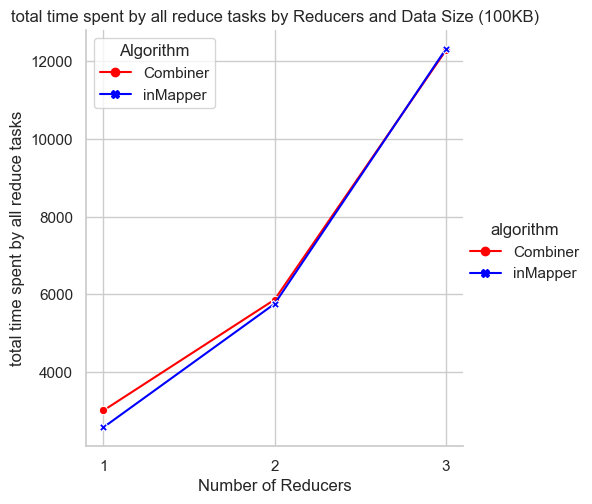

<Figure size 1000x600 with 0 Axes>

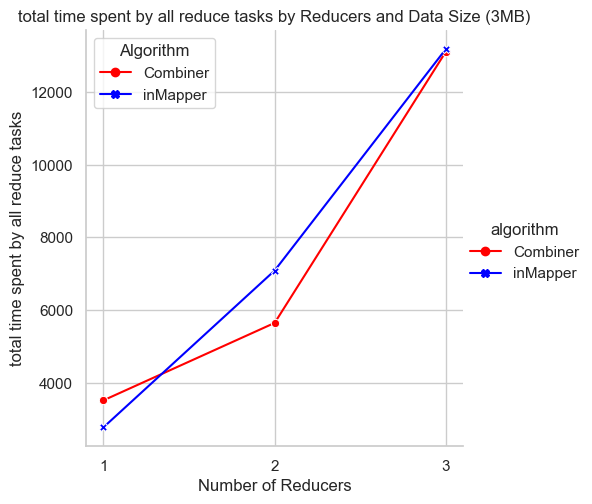

<Figure size 1000x600 with 0 Axes>

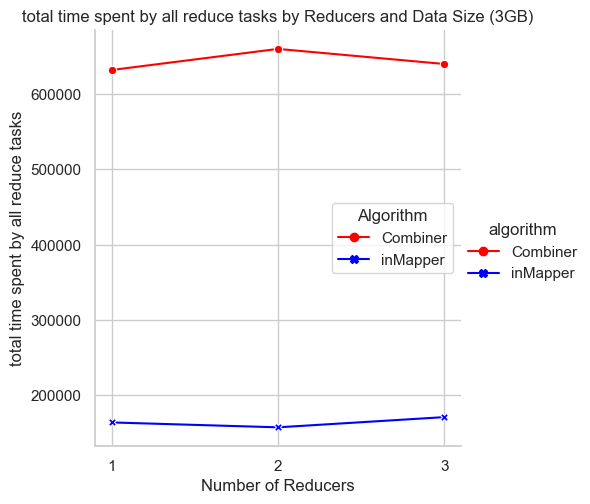

<Figure size 1000x600 with 0 Axes>

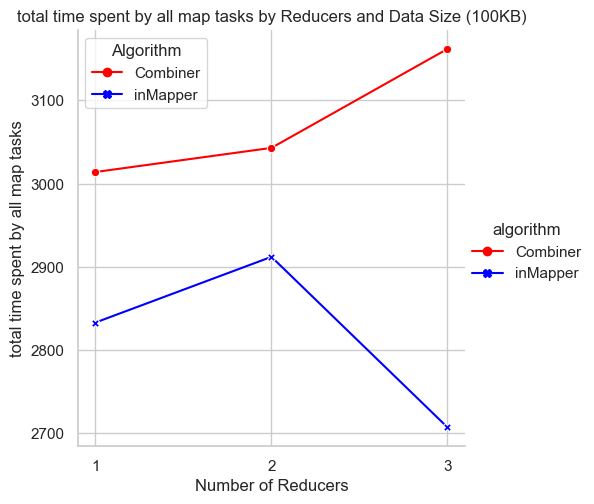

<Figure size 1000x600 with 0 Axes>

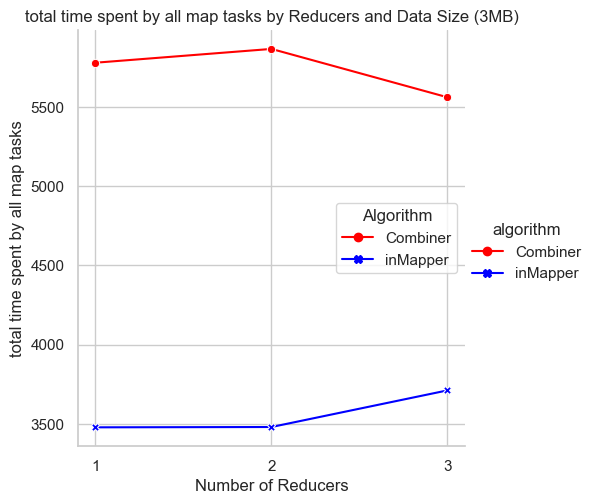

<Figure size 1000x600 with 0 Axes>

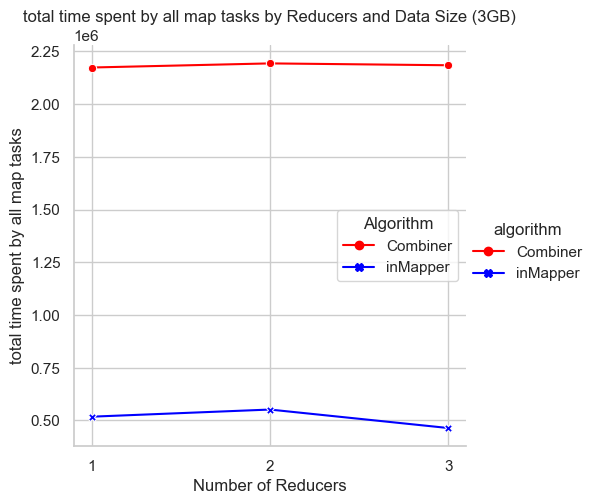

<Figure size 1000x600 with 0 Axes>

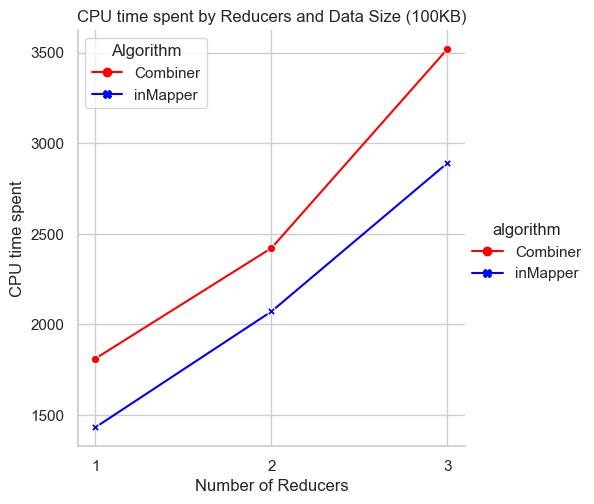

<Figure size 1000x600 with 0 Axes>

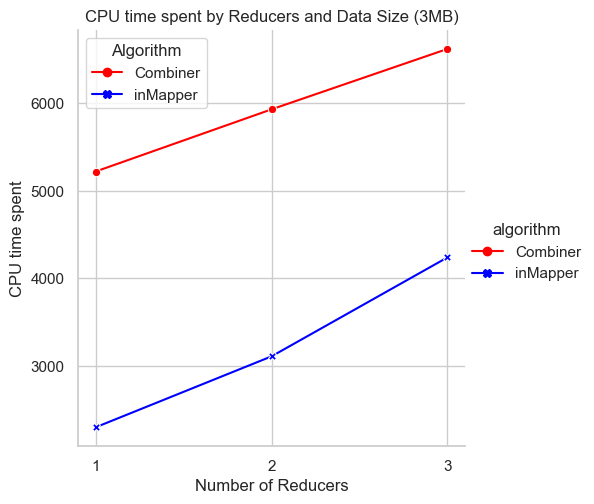

<Figure size 1000x600 with 0 Axes>

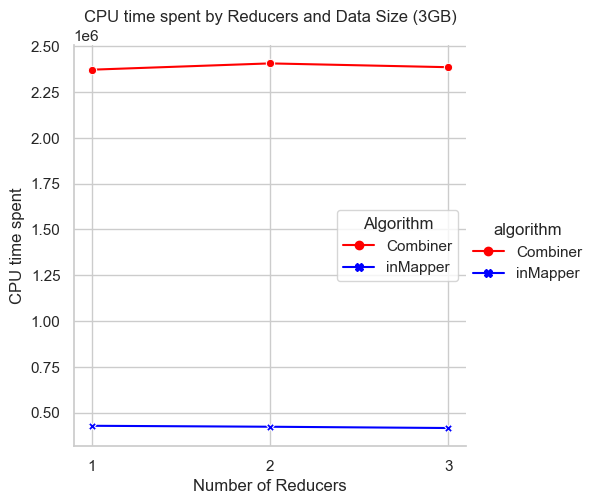

<Figure size 1000x600 with 0 Axes>

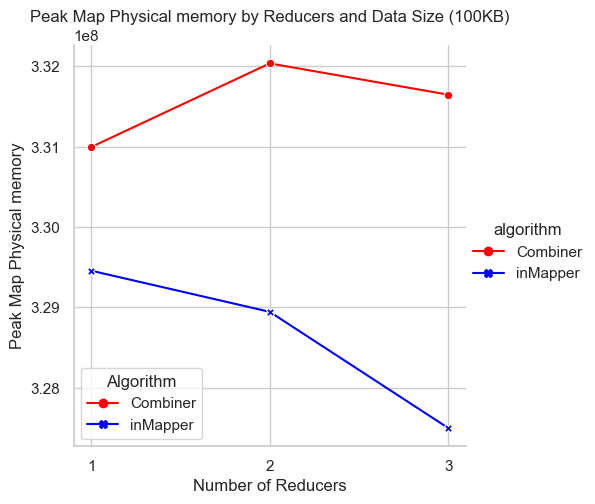

<Figure size 1000x600 with 0 Axes>

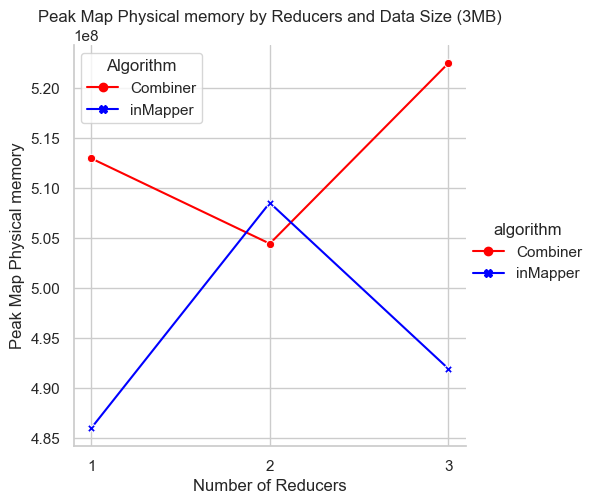

<Figure size 1000x600 with 0 Axes>

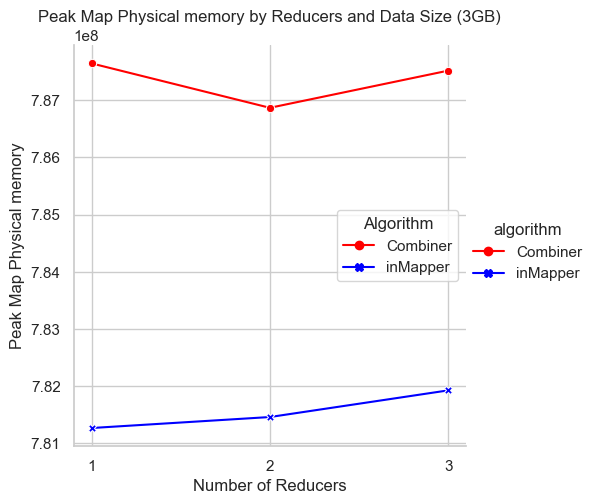

<Figure size 1000x600 with 0 Axes>

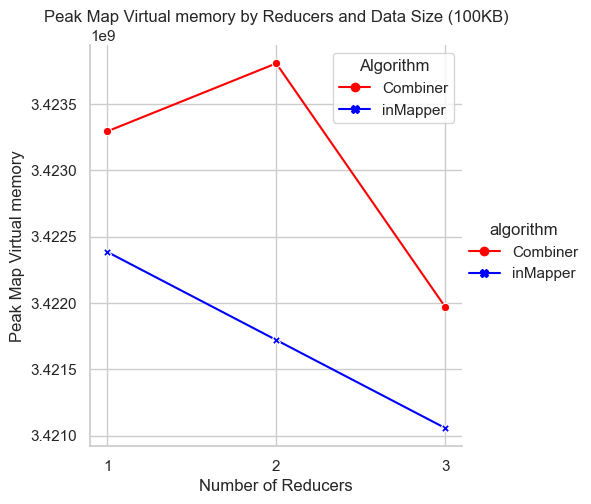

<Figure size 1000x600 with 0 Axes>

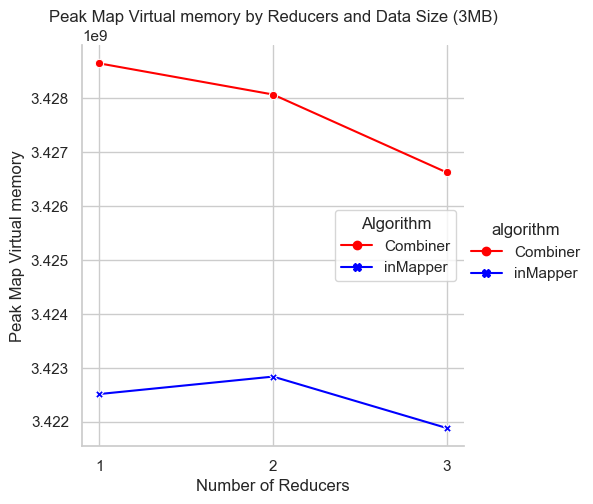

<Figure size 1000x600 with 0 Axes>

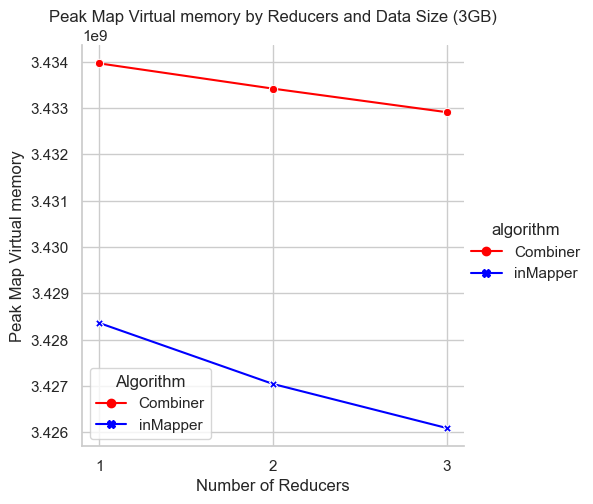

<Figure size 1000x600 with 0 Axes>

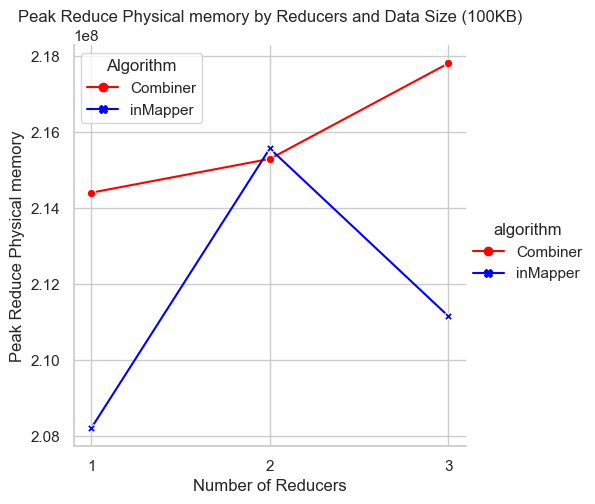

<Figure size 1000x600 with 0 Axes>

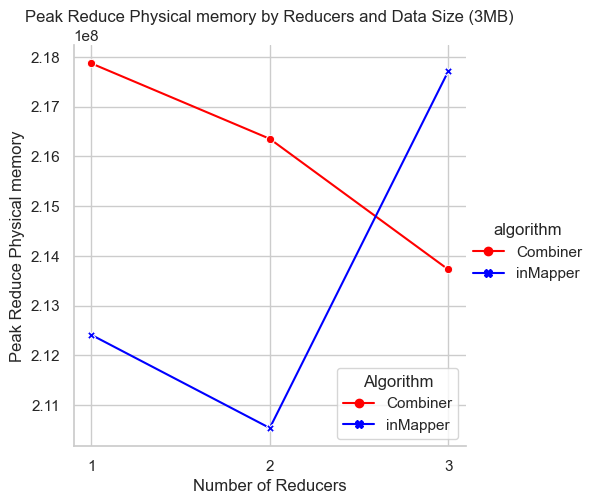

<Figure size 1000x600 with 0 Axes>

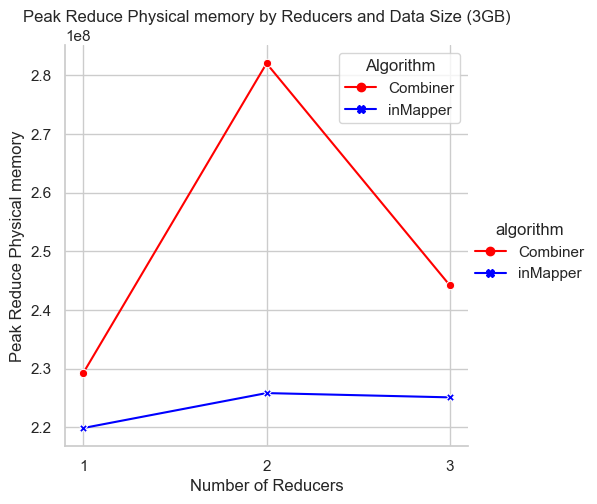

<Figure size 1000x600 with 0 Axes>

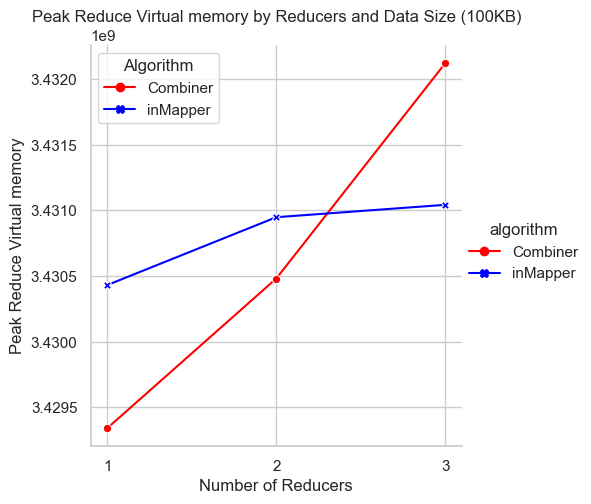

<Figure size 1000x600 with 0 Axes>

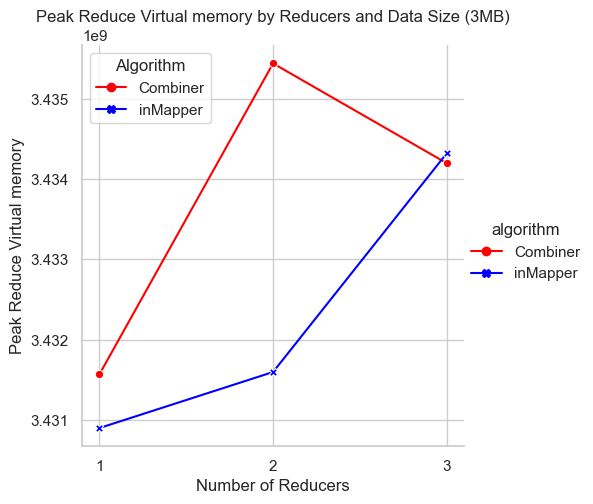

<Figure size 1000x600 with 0 Axes>

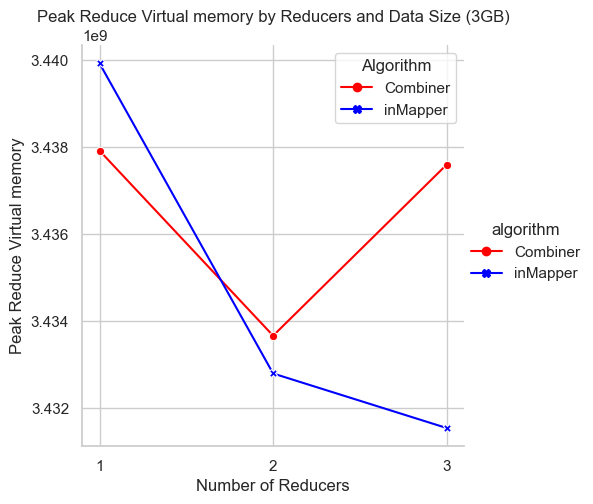

<Figure size 1000x600 with 0 Axes>

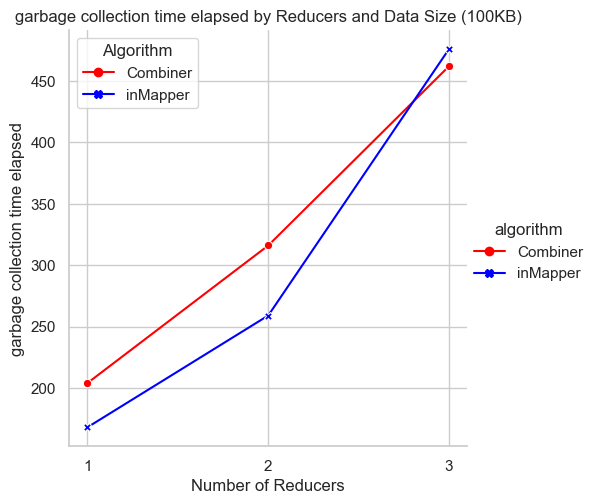

<Figure size 1000x600 with 0 Axes>

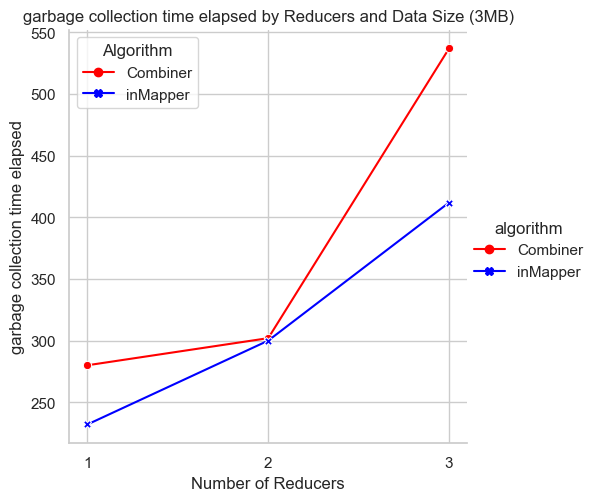

<Figure size 1000x600 with 0 Axes>

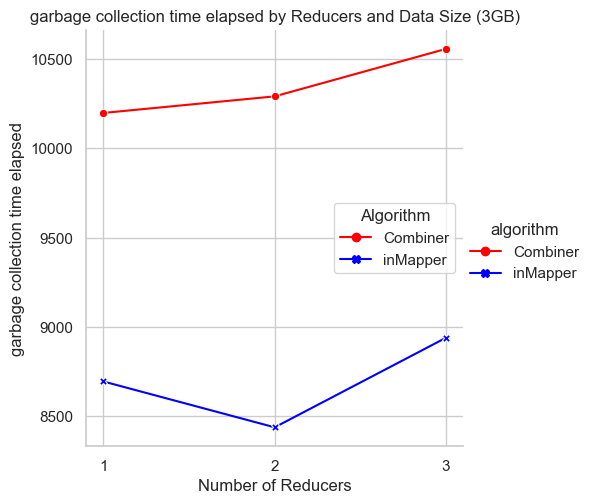

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_metric(metric_name):
    # Filter data for the metric and the specified data sizes
    data_sizes = ['100KB', '3MB', '3GB']
    
    for size in data_sizes:
        metrics_filtered = df[df['size'] == size]
        
        # Define plot aesthetics
        sns.set(style='whitegrid')
        
        # Plot using seaborn's relplot
        plt.figure(figsize=(10, 6))
        plot = sns.relplot(x='n_reducers', y=metric_name, hue='algorithm', style='algorithm',
                           kind='line', data=metrics_filtered,
                           palette={'Combiner': 'red', 'inMapper': 'blue'}, markers=True, dashes=False)
        
        # Customize labels and title
        plt.title(f'{metric_name} by Reducers and Data Size ({size})')
        plt.xlabel('Number of Reducers')
        plt.ylabel(metric_name)
        
        # Show legend
        plt.legend(title='Algorithm')
        
        # Show plot
        plt.show()

metrics_to_plot = [
    'total time spent by all reduce tasks',
    'total time spent by all map tasks',
    'CPU time spent',
    'Peak Map Physical memory',
    'Peak Map Virtual memory',
    'Peak Reduce Physical memory',
    'Peak Reduce Virtual memory',
    'garbage collection time elapsed'
]

for metric in metrics_to_plot:
    plot_metric(metric)


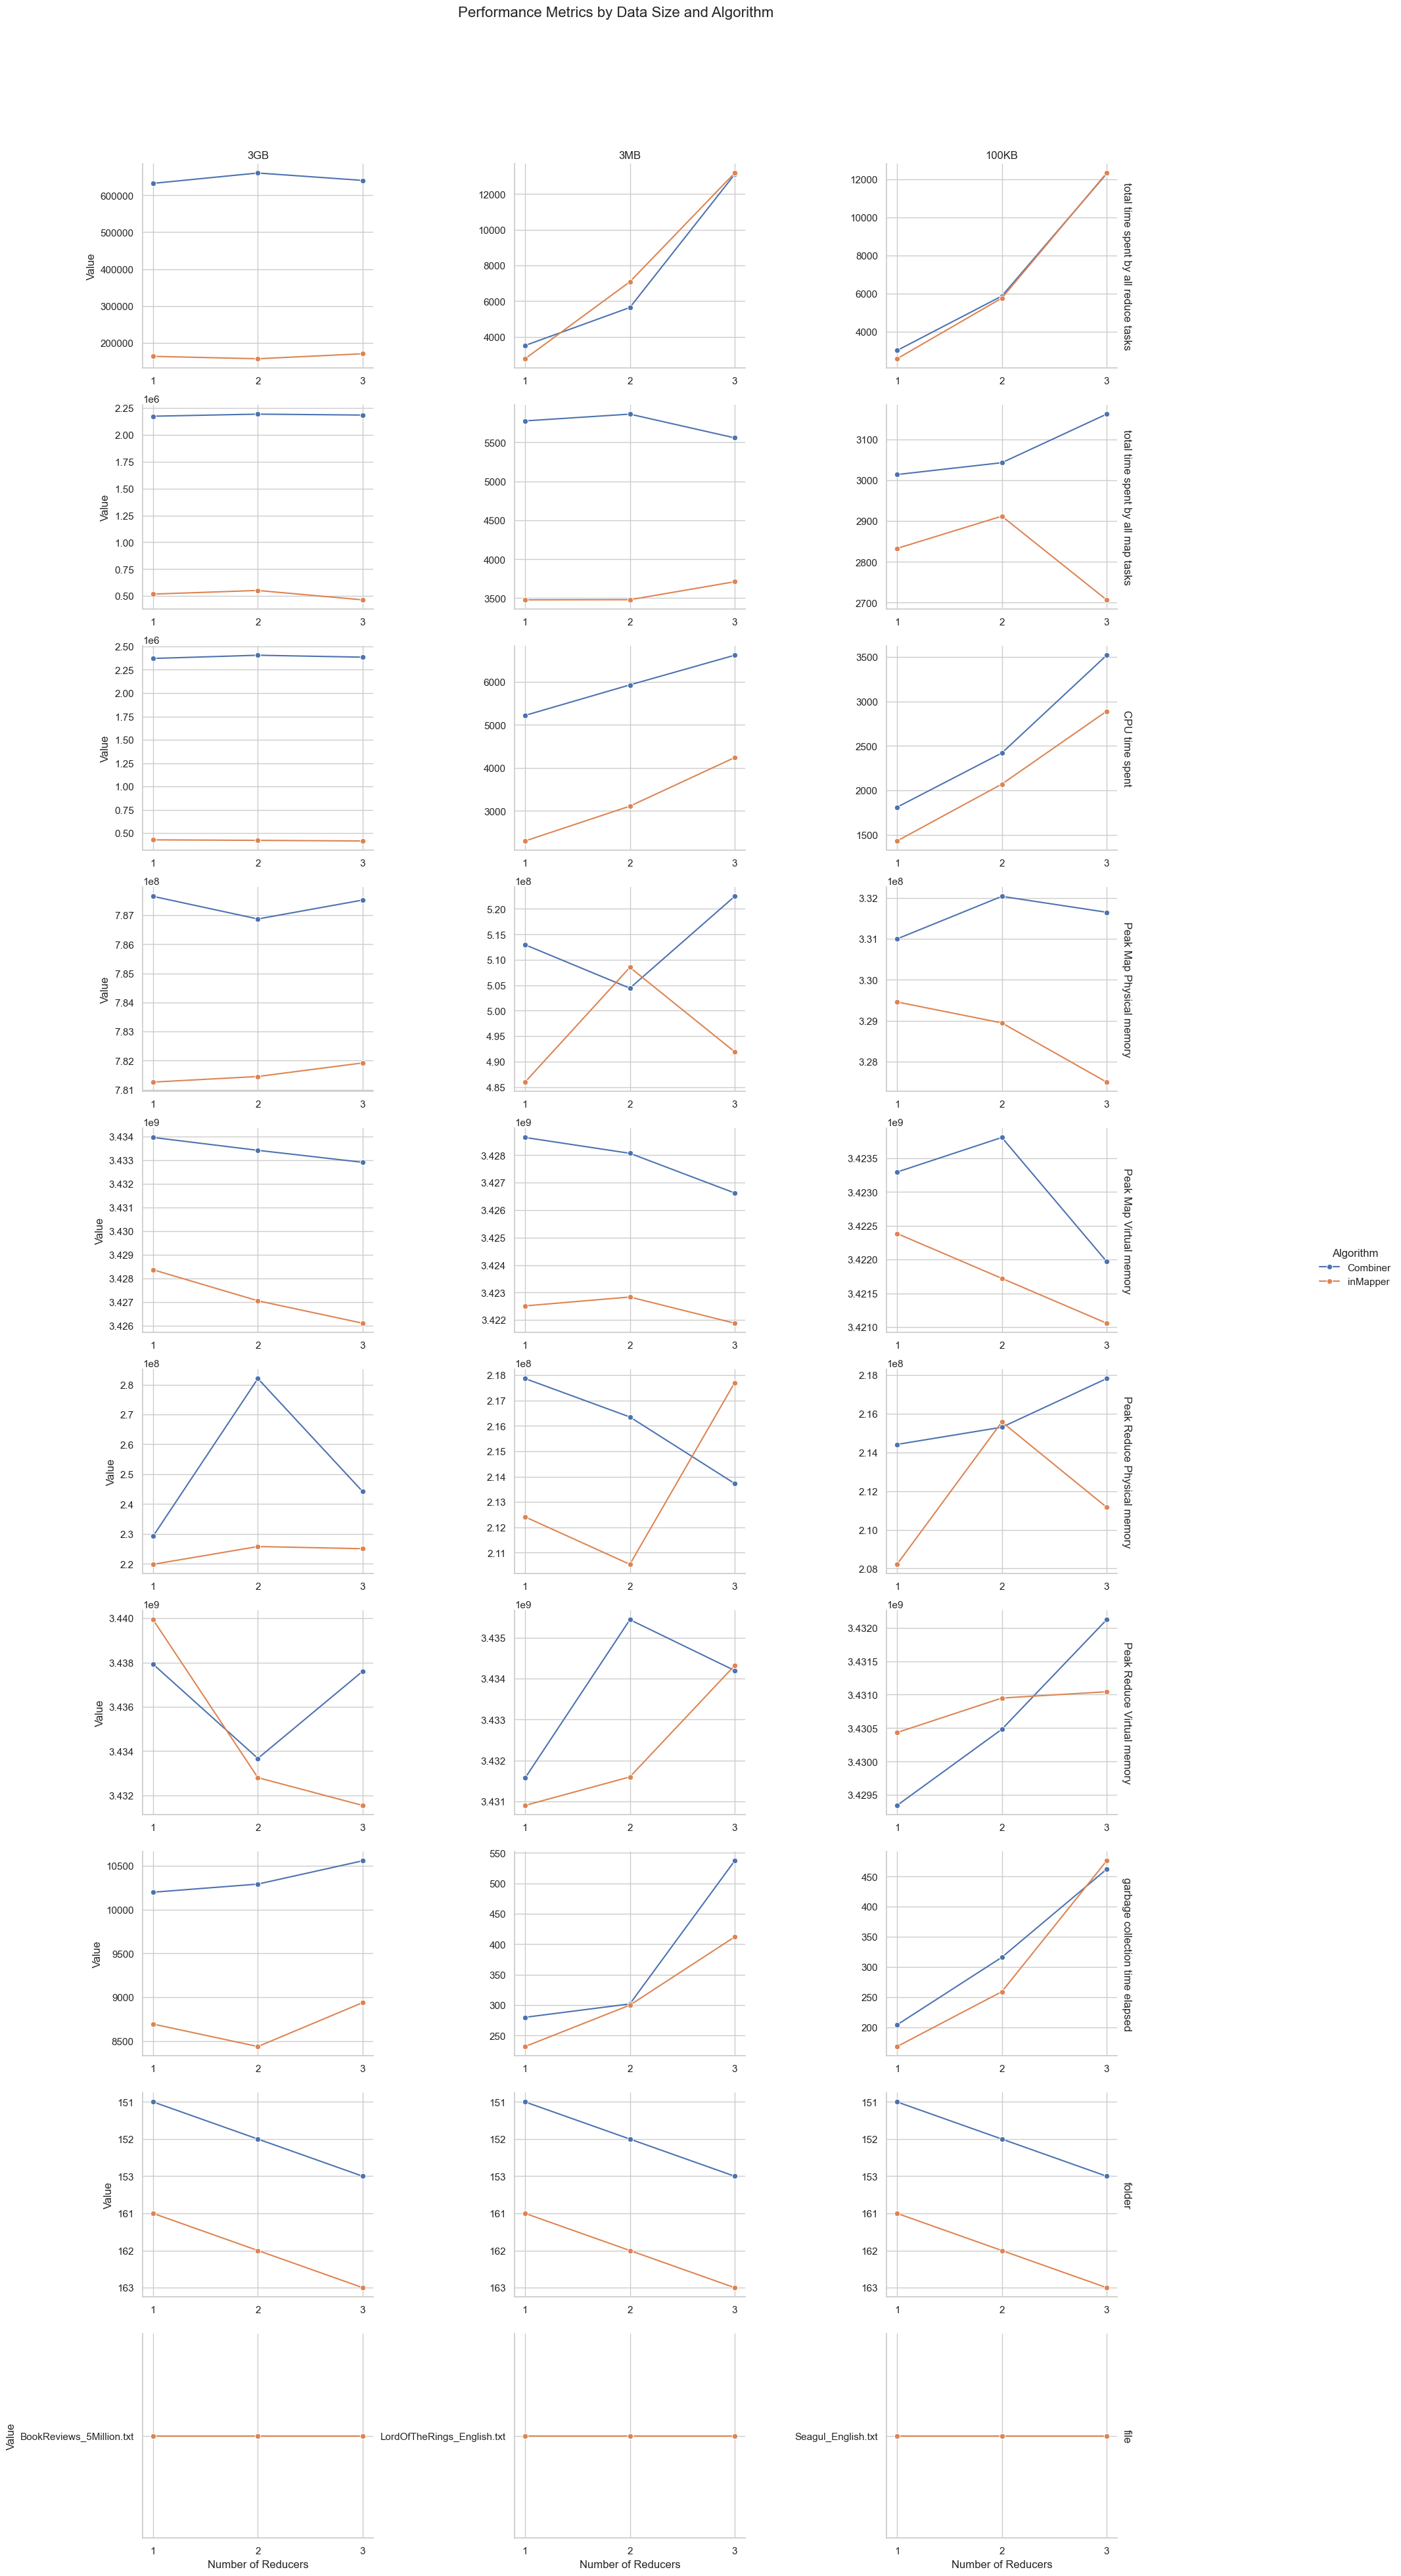

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assume `df` is your DataFrame
# Melt the DataFrame
df_melted = df.melt(id_vars=['size', 'algorithm', 'n_reducers'], var_name='param', value_name='value')

# Define plot aesthetics
sns.set(style='whitegrid')

# Generate the FacetGrid
g = sns.FacetGrid(df_melted, row='param', col='size', hue='algorithm', margin_titles=True, sharey=False, sharex=False, height=4, aspect=1.5)

# Generate plots
g.map(sns.lineplot, 'n_reducers', 'value', marker='o')

# Customize the legend and titles
g.add_legend(title='Algorithm', bbox_to_anchor=(1.05, 0.5), loc='center left')
g.set_axis_labels('Number of Reducers', 'Value')
g.set_titles(col_template='{col_name}', row_template='{row_name}')

# Adjust layout
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Performance Metrics by Data Size and Algorithm', fontsize=16)

# Show plot
plt.show()
